In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#dropping all acct_type variables as they seem to mess up the clustering (all I've read indicates it isn't super great mathmatically to include them if using kmeans anyways)
financial_grouped_cluster = pd.read_csv('financial_grouped2.csv').drop(columns = ['cust_id','acct_type_CK  ','acct_type_CC  ','acct_type_SV  '])

In [3]:
#coorelation calculation
financial_grouped_cluster.corr()

,trans_Category_large,trans_Category_medium,trans_Category_small,credit_balance,savings_balance
trans_Category_large,1.000000,0.590852,0.183775,0.193950,0.265530
trans_Category_medium,0.590852,1.000000,0.480069,0.151235,0.087645
trans_Category_small,0.183775,0.480069,1.000000,0.045178,-0.054019
credit_balance,0.193950,0.151235,0.045178,1.000000,0.036840
savings_balance,0.265530,0.087645,-0.054019,0.036840,1.000000


In [4]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

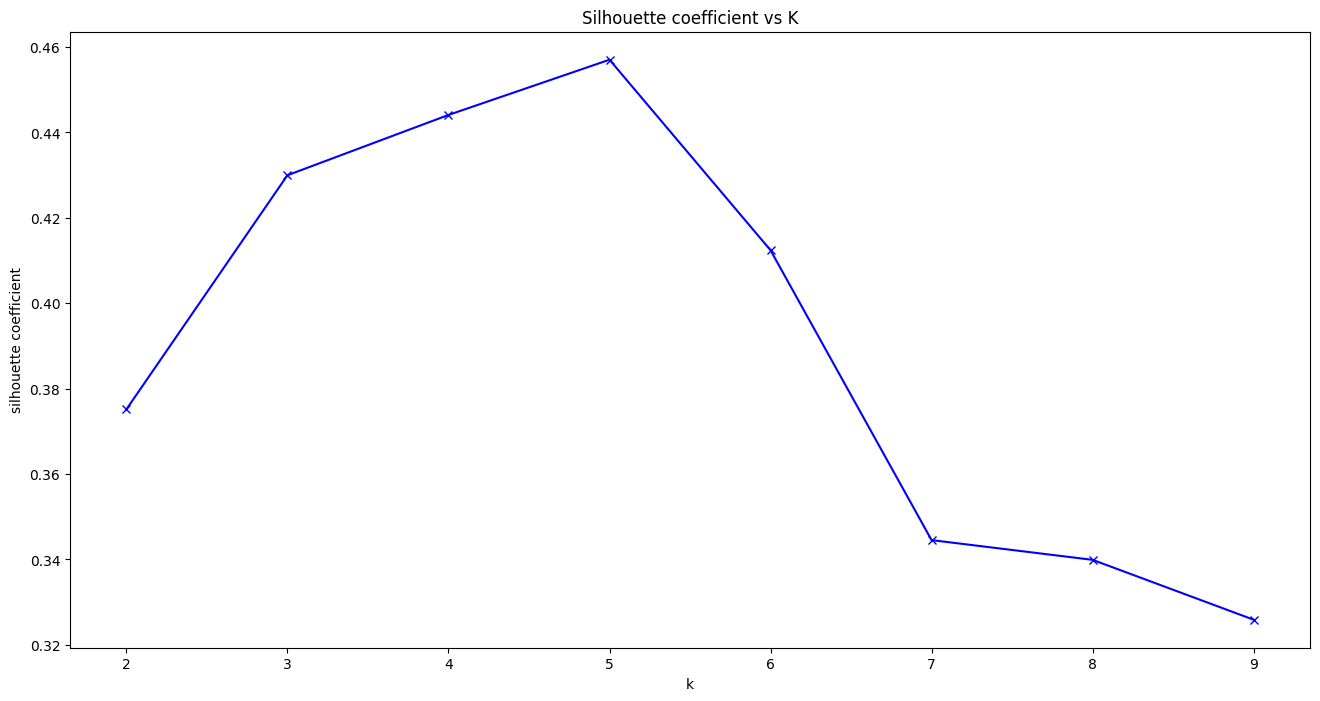

In [5]:
#silhouette method
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(financial_grouped_cluster)
    label=kmeanModel.predict(financial_grouped_cluster)
    silhouettes.append(silhouette_score(financial_grouped_cluster,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

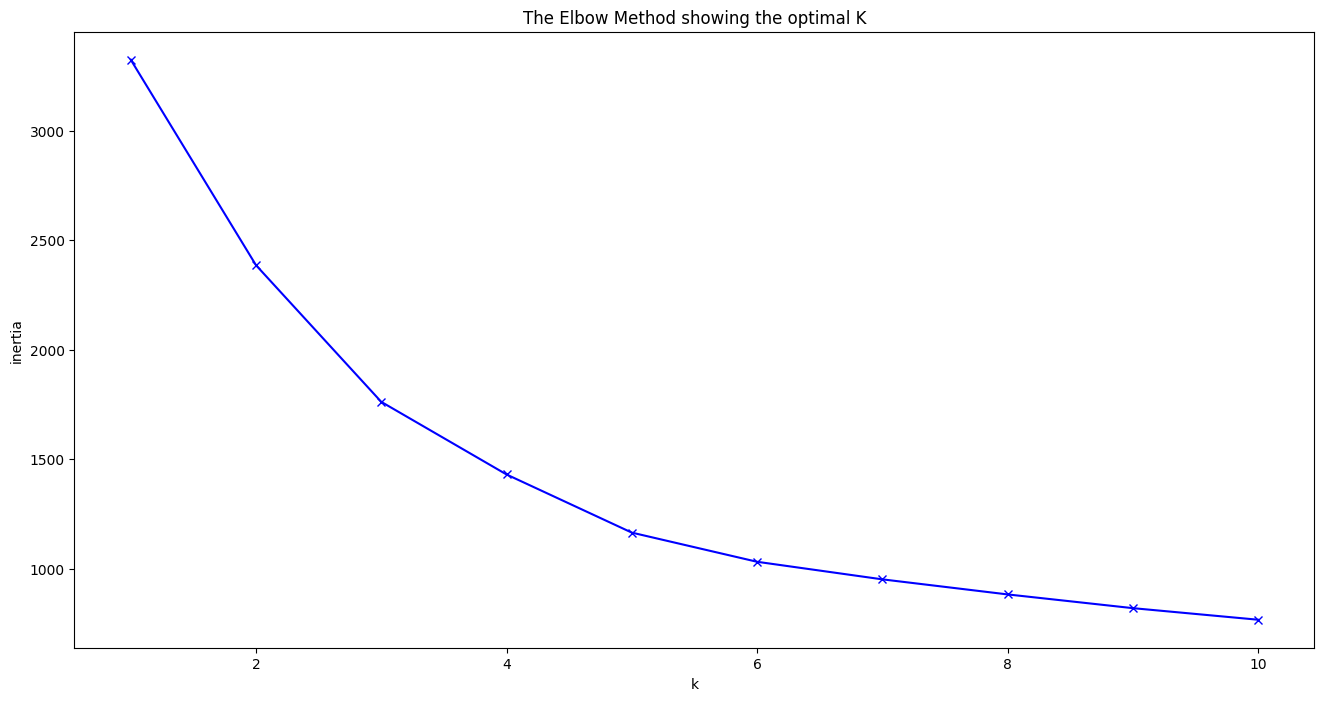

In [6]:
#elbow method with scaled data
inertias = []
K = range(1,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(financial_grouped_cluster)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [7]:
#Create Model
model = KMeans(5)

# Train model
model.fit(financial_grouped_cluster)

# Make predictions
y_pred = model.predict(financial_grouped_cluster)

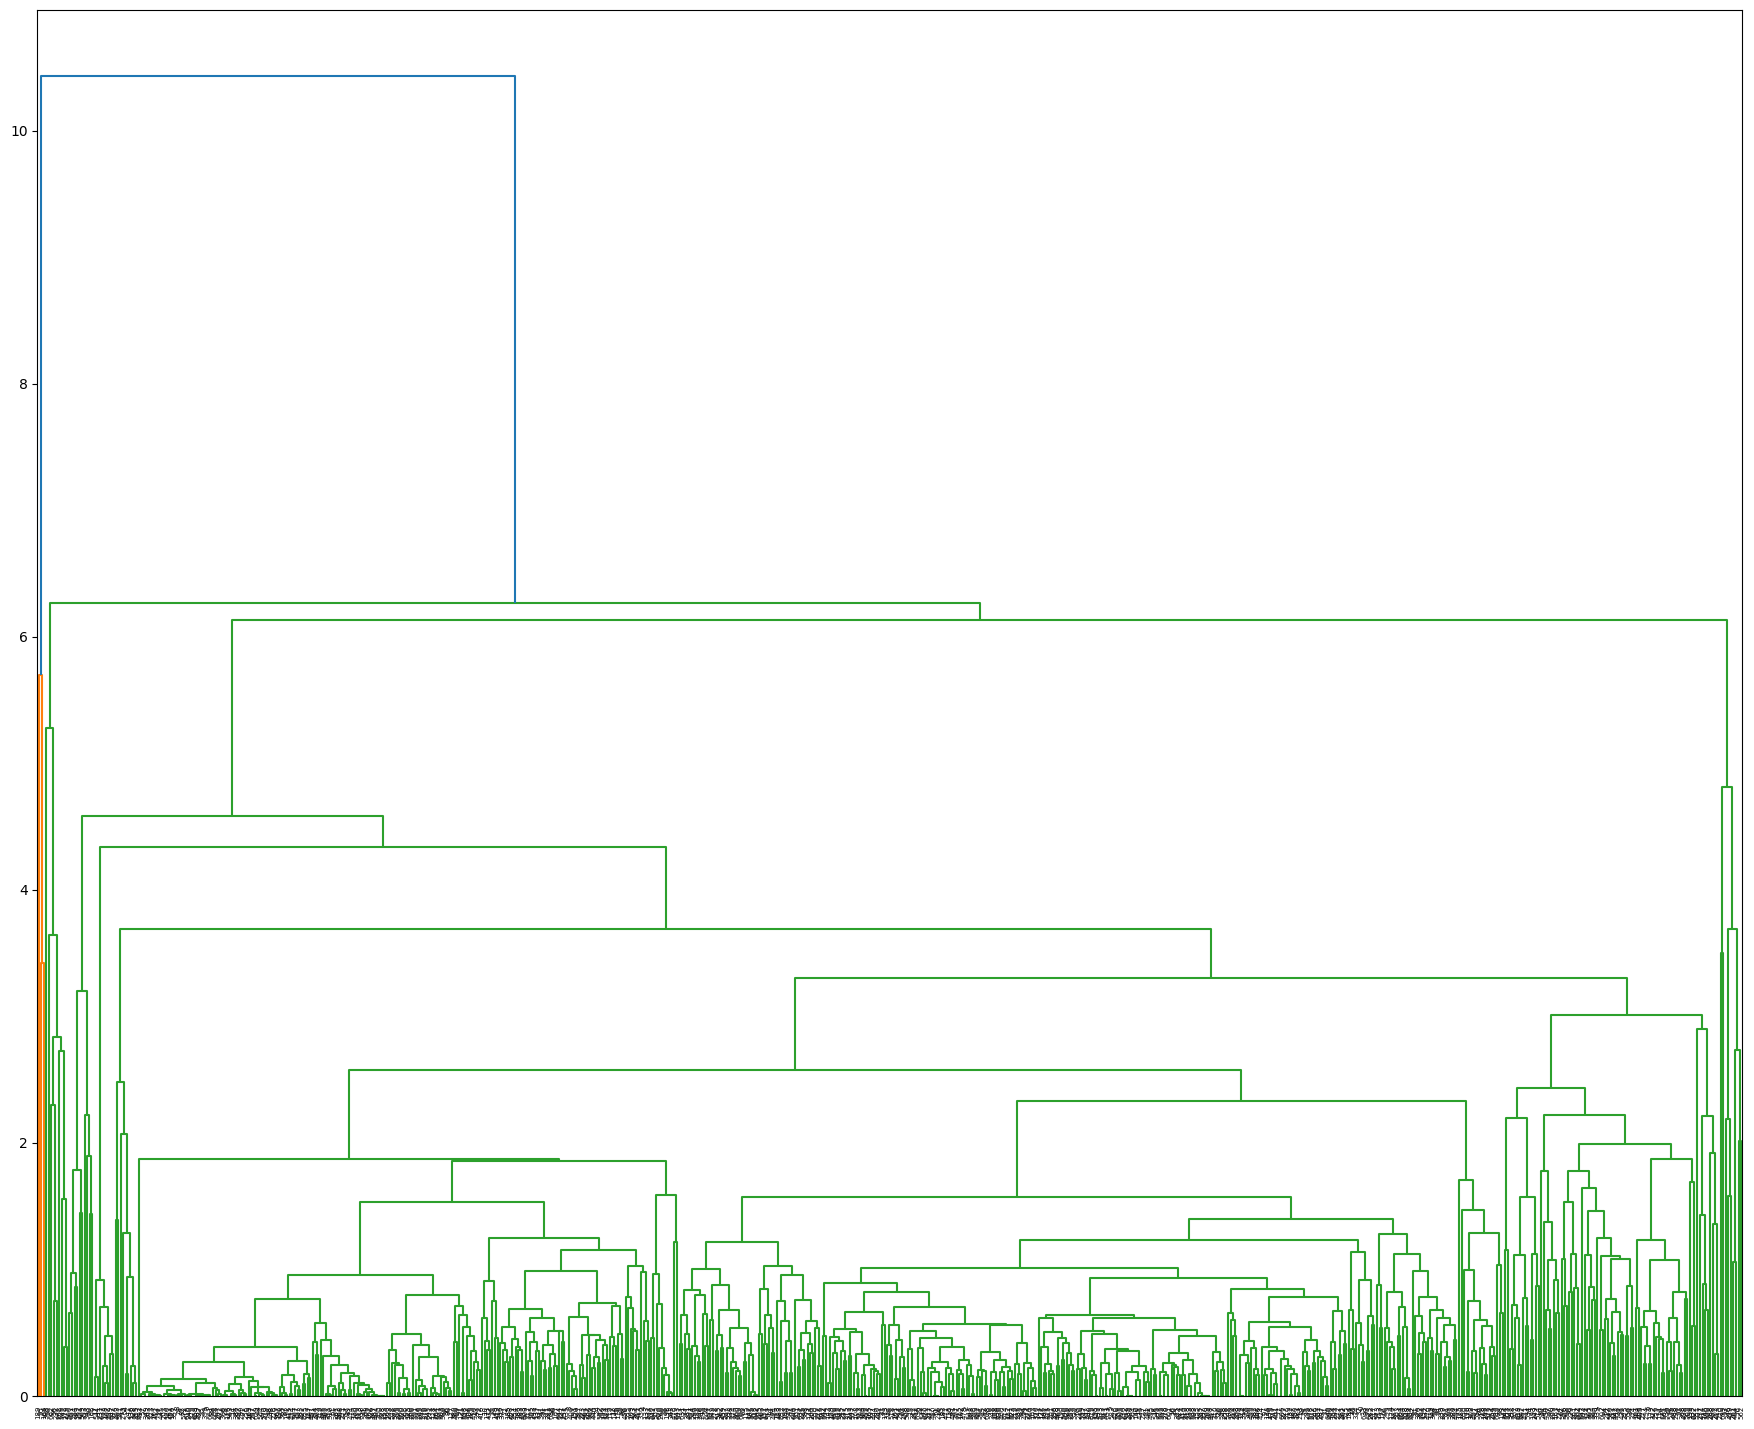

In [8]:
#poor dendrograms
from scipy.cluster.hierarchy import linkage, dendrogram

#plot dendrogram
linkage_matrix = linkage(financial_grouped_cluster,method = 'average')
plt.figure(figsize=(22,18))
dendrogram(linkage_matrix)

plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
# Hierarchical clustering
# single
single = AgglomerativeClustering(n_clusters=3, linkage="single")
single_pred = single.fit_predict(financial_grouped_cluster)

# complete
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(financial_grouped_cluster)

# average
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(financial_grouped_cluster)

In [10]:
single_silhouette = silhouette_score(financial_grouped_cluster, single_pred)
complete_silhouette = silhouette_score(financial_grouped_cluster, complete_pred)
avg_silhouette = silhouette_score(financial_grouped_cluster, avg_pred)

print( "Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette)

Scores: 
Single: 0.638549165845299 
Complete:  0.6236211255806364 
Average:  0.5886511841718353


In [11]:
#DBSCAN cluster
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [12]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=.5, min_samples=8)
db.fit(financial_grouped_cluster) #algorithm runs

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
#core_samples_mask will be True if the data point was a core point. Otherwise false.

labels = db.labels_
#actual cluster label. If outliers, gets assigned -1

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #number of unique clusters labels (excluding -1)
n_noise_ = list(labels).count(-1) #counts how many outliers there are (labels with -1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 196


In [13]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(financial_grouped_cluster)
pcadf = pd.DataFrame(pca.transform(financial_grouped_cluster))

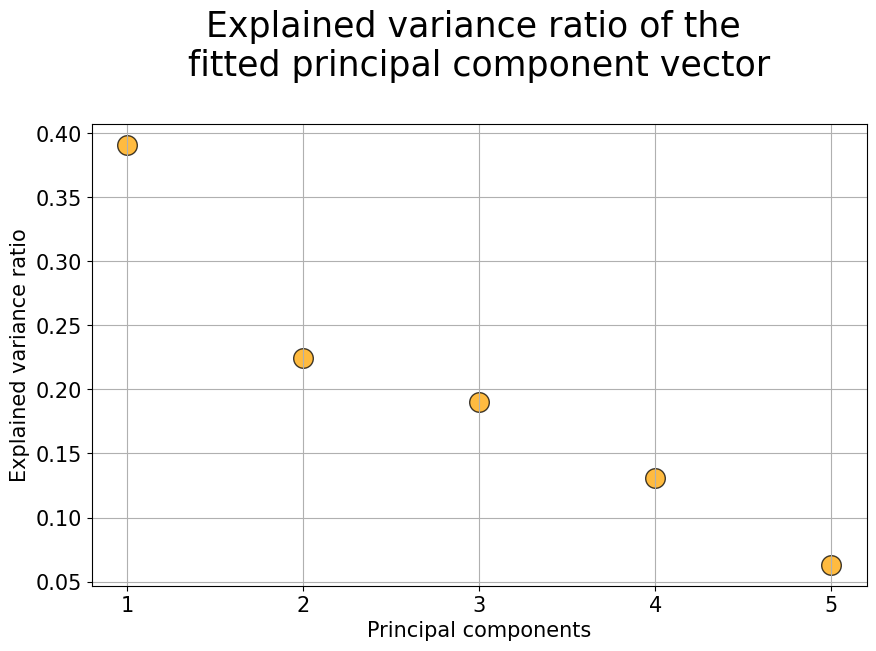

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

Text(0, 0.5, '% Cumulative explained variance')

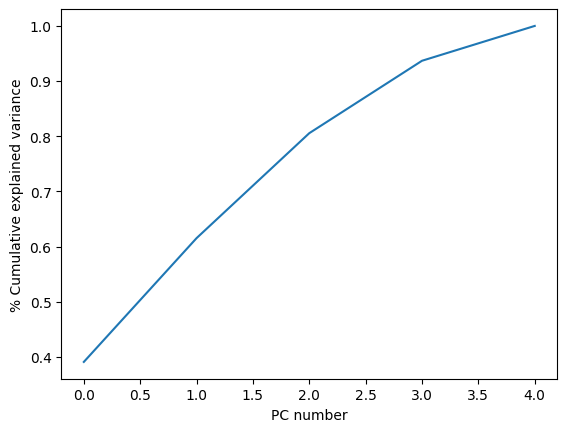

In [15]:
cum_explained_variance = np.cumsum(dfx_pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

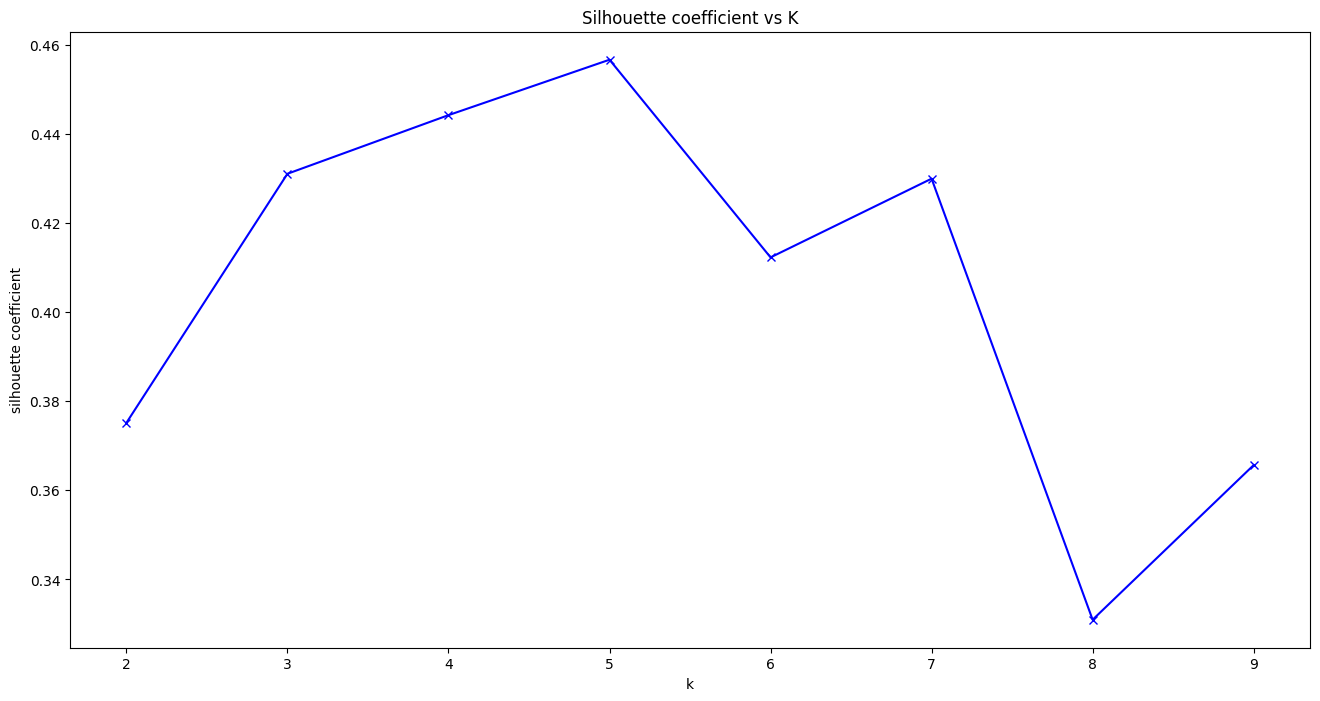

In [16]:
#silhouette method
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pcadf)
    label=kmeanModel.predict(pcadf)
    silhouettes.append(silhouette_score(pcadf,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [17]:
pcadf

,0,1,2,3,4
0,0.704679,-0.226740,-0.826002,0.017781,0.371739
1,-0.016695,-0.002736,-0.679056,-1.106374,0.495674
2,0.506833,-0.662015,0.226659,-0.099394,0.369578
3,-1.535836,0.117141,-0.213312,0.472454,-0.005961
4,-0.940006,-0.012004,0.830881,-0.185202,0.450887
...,...,...,...,...,...
660,-1.662549,1.441676,-0.559864,0.186475,-0.244217
661,-1.927576,0.469343,-0.086444,0.865194,-0.108168
662,2.355129,1.465261,4.146258,-0.575003,1.732021
663,1.181038,-0.800375,-0.787538,0.338887,-1.026134


In [18]:
#Create Model
model = KMeans(5)

# Train model
model.fit(pcadf)

# Make predictions
y_pred = model.predict(pcadf)

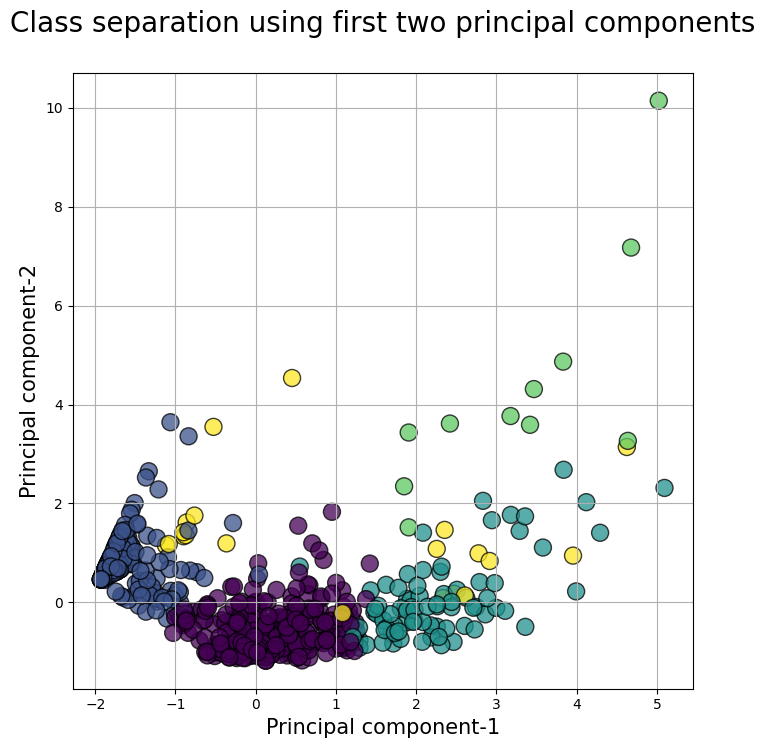

In [19]:
#On original KMeans
dfx_trans = pca.transform(financial_grouped_cluster)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(8,8))
plt.scatter(dfx_trans[0],dfx_trans[1],c=y_pred,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [20]:
#import unedited df & drop index
financial_final = pd.read_csv('financial_final.csv').drop(columns='Unnamed: 0')

In [21]:
#group by customer id to make df same size as clusters and then append y_pred from kmeans clustering
financial_radar = financial_final.groupby('cust_id').max()
#using kmeans
financial_radar['class'] = y_pred.astype('str')

In [22]:
financial_radar['class'].value_counts()

class
0    360
1    189
2     83
4     22
3     11
Name: count, dtype: int64

In [27]:
financial_radar.head()

,account_active,trans_Category_large,trans_Category_medium,trans_Category_small,credit_balance,savings_balance,years_with_bank,acct_type_CC,acct_type_CK,acct_type_SV,class
cust_id,,,,,,,,,,,
1362480,Y,7.0,8.0,84.0,20.00,1187.97,3,1,1,1,0
1362484,Y,2.0,3.0,94.0,369.72,2122.17,2,1,1,1,0
1362485,Y,5.0,7.0,87.0,1100.00,NaN,4,1,1,0,0
1362486,Y,0.0,1.0,24.0,NaN,116.24,6,0,1,1,1
1362487,Y,1.0,0.0,51.0,1548.23,12.89,1,1,1,1,1


In [28]:
#create new df of means of each variable per class
financial_radar_final = financial_radar.groupby(by='class').mean()

TypeError: Could not convert Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y N Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y N Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y N Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y N Y Y N Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y N Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y  to numeric

In [ ]:
import plotly.express as px

#function to create radar plots for each variable in df
def radarplot(df):

    columns = df.columns
    i=0
    while i < len(columns):
        r=columns[i]
        theta=df.index
        fig = px.line_polar(financial_radar_final,r=r,theta=theta,line_close=True,title=r)
        fig.show()
        i+=1

In [ ]:
#Segment 0: Tons of small transactions
#SEgment 1: Few transactions of any type
#Segment 2: many transactions of all types
#Segment 3: High transactions high savings
#Segment 4: High credit balance

In [ ]:
financial_radar2 = financial_grouped_cluster

In [ ]:
financial_radar2['class'] = y_pred.astype('str')

In [ ]:
financial_radar2_final = financial_radar2.groupby(by='class').mean()

In [ ]:
import plotly.express as px

#function to create radar plots with all variables for each cluster
def radarplot2(df):
    #saved cluster names as strings above so need this list to import
    clusters = ['0','1','2','3','4']
    columns = df.columns[:5]
    i=0
    while i < len(clusters):
        r=df.loc[clusters[i]]
        theta=columns
        fig = px.line_polar(financial_radar_final,r=r,theta=theta,line_close=True)
        fig.show()
        i+=1

In [ ]:
import plotly.graph_objs as go

In [ ]:
max_df = financial_radar_final
max_df['trans_Category_large'] = financial_radar_final['trans_Category_large']/financial_radar_final['trans_Category_large'].max()
max_df['trans_Category_medium'] = financial_radar_final['trans_Category_medium']/financial_radar_final['trans_Category_medium'].max()
max_df['trans_Category_small'] = financial_radar_final['trans_Category_small']/financial_radar_final['trans_Category_small'].max()
max_df['savings_balance'] = financial_radar_final['savings_balance']/financial_radar_final['savings_balance'].max()
max_df['credit_balance'] = financial_radar_final['credit_balance']/financial_radar_final['credit_balance'].max()

In [ ]:
#Radar plot: Attempt to plot as % of max of column

#Plot features (columns) as theta (angle). Use the data grouped by the clusters
angle = financial_radar_final.columns[:5]
cluster_list = ['0','1','2','3','4']
# 3: Initialize plot/figure
chart = go.Figure()

# Loop over each cluster 
for i in cluster_list:
    # Select column values in df_scaled
    radius = max_df.loc[i].values
    # Plot values
    chart .add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {i}'
            )
        )
# Add labels etc
chart.update_layout(
polar=dict (radialaxis = dict(visible = True,range=[0,1])),
showlegend=True
        )

chart.show()

In [ ]:
financial_grouped_cluster

In [ ]:
financial_radar.groupby(by='class').mean()